# TOPIC : IRIS Flowers classification ML project


## INTERN : Shritej anil lakade 

### #LGMVIPSEPT

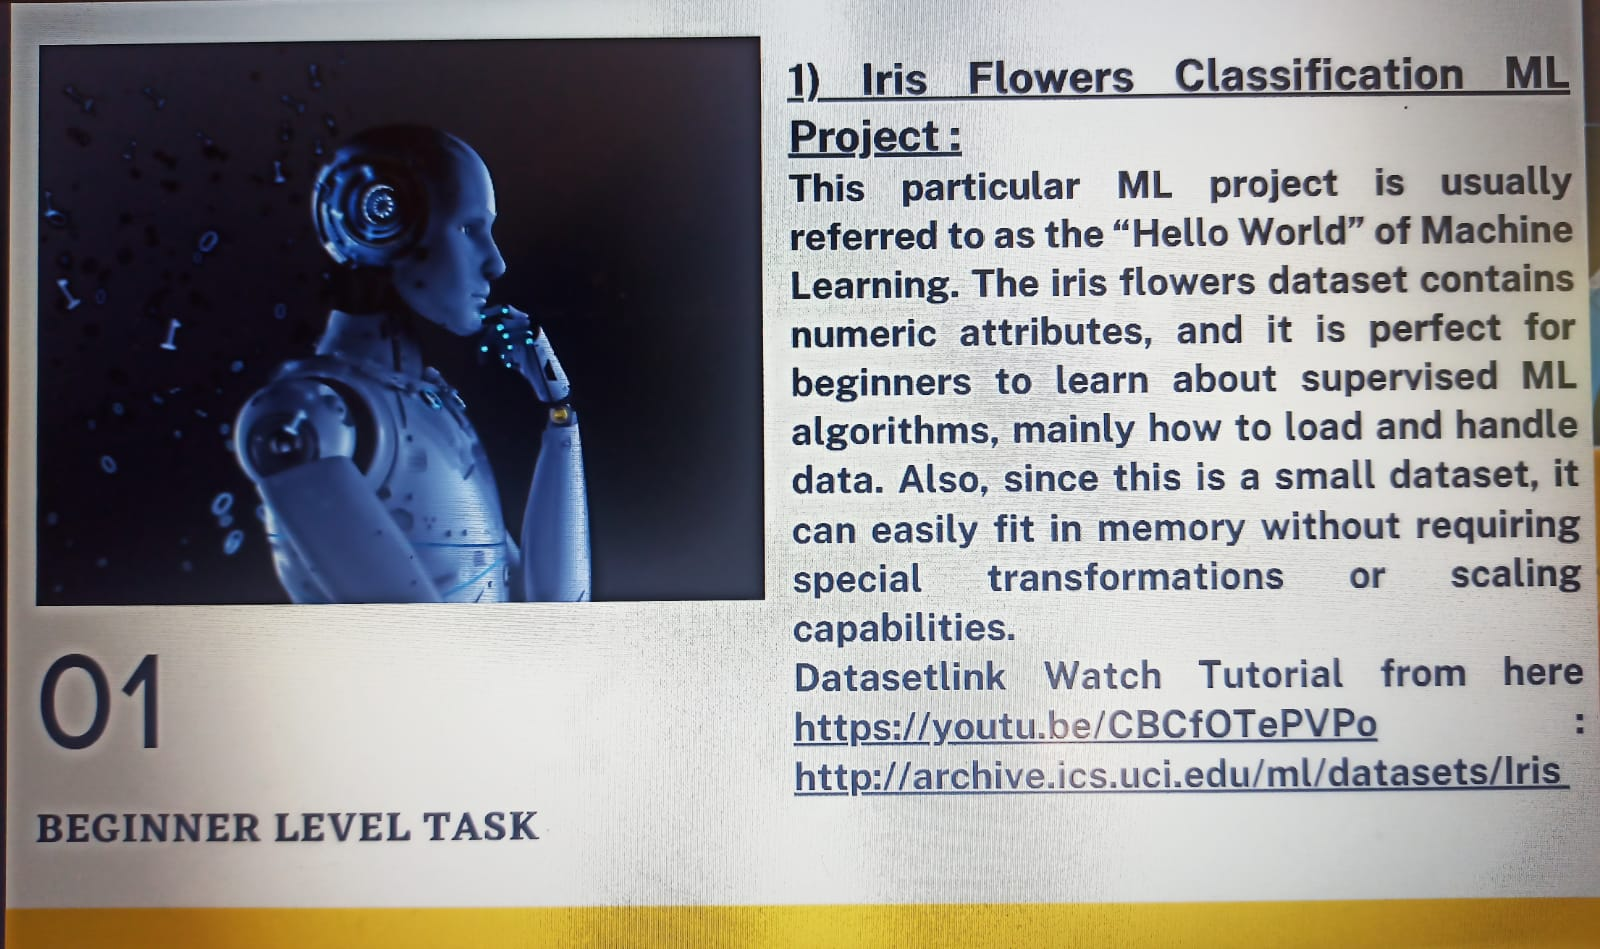

Dataset :http://archive.ics.uci.edu/ml/datasets/Iris

### Importing all library

In [5]:

import pandas as pd 
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt 


### Loading the dataset

In [10]:
df= pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
               names=["Sepal length","Sepal width","Petal length","Petal width","Species"])

In [7]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.tail()

,Sepal length,Sepal width,Petal length,Petal width,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Display stats about data 

In [11]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
#to display basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
# To display no of sample of each class 
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

# Preprocessing of dataset

In [14]:
#cheak for null values
df.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Species         0
dtype: int64

# Exploratory Data analysis

<AxesSubplot:>

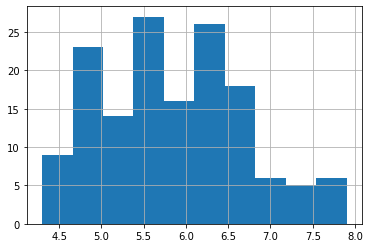

In [15]:
#Histogram
df['Sepal length'].hist()

<AxesSubplot:>

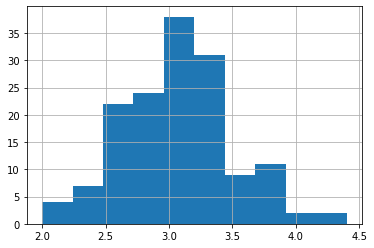

In [16]:
df['Sepal width'].hist()

<AxesSubplot:>

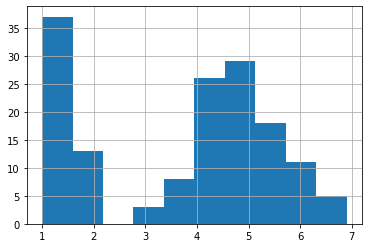

In [17]:
df['Petal length'].hist()

<AxesSubplot:>

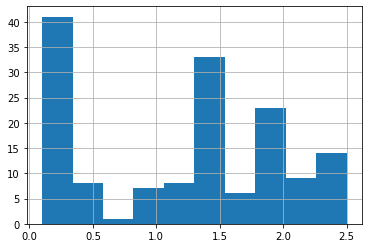

In [18]:
df['Petal width'].hist()

In [19]:
#scatterplots
colours =['red','orangr','blue']
species =['Iris-versicolor','Iris-virginica','Iris-setosa']

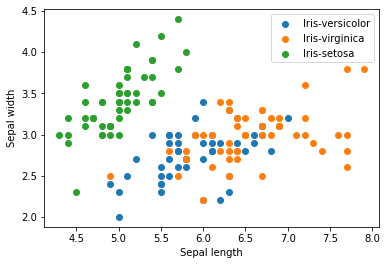

In [20]:
for i in range(3):
    x =df[df['Species'] == species[i]]
    plt.scatter(x['Sepal length'],x['Sepal width'] , label=species[i],)
plt.xlabel('Sepal length') 
plt.ylabel('Sepal width')
plt.legend()

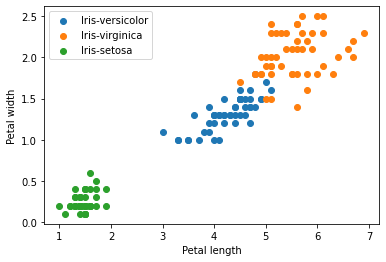

In [21]:
for i in range(3):
    x =df[df['Species'] == species[i]]
    plt.scatter(x['Petal length'],x['Petal width'] , label=species[i],)
plt.xlabel('Petal length') 
plt.ylabel('Petal width')
plt.legend()

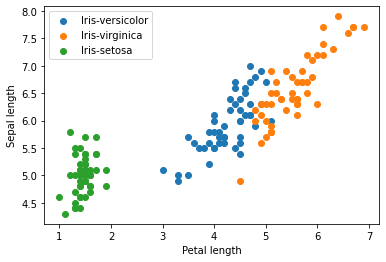

In [22]:
for i in range(3):
    x =df[df['Species'] == species[i]]
    plt.scatter(x['Petal length'],x['Sepal length'] , label=species[i],)
plt.xlabel('Petal length') 
plt.ylabel('Sepal length')
plt.legend()

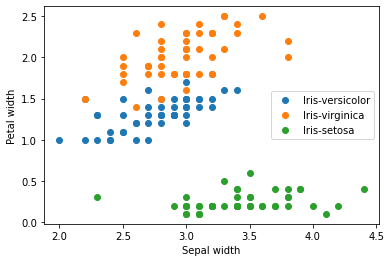

In [23]:
for i in range(3):
    x =df[df['Species'] == species[i]]
    plt.scatter(x['Sepal width'],x['Petal width'] , label=species[i],)
plt.xlabel('Sepal width') 
plt.ylabel('Petal width')
plt.legend()

# Coorelation Matrix

In [24]:
df.corr()

,Sepal length,Sepal width,Petal length,Petal width
Sepal length,1.000000,-0.109369,0.871754,0.817954
Sepal width,-0.109369,1.000000,-0.420516,-0.356544
Petal length,0.871754,-0.420516,1.000000,0.962757
Petal width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

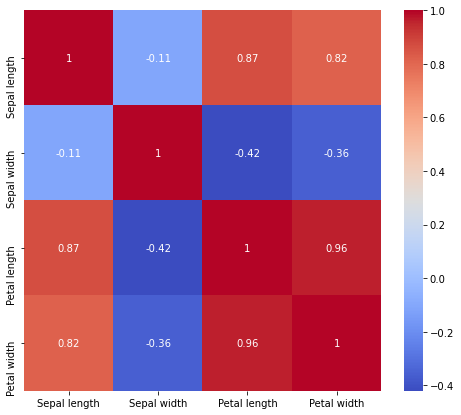

In [25]:
corr= df.corr()
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(corr, annot=True,ax=ax,cmap = 'coolwarm')

# Label Encoder

In [26]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [27]:
df['Species'] = le.fit_transform(df['Species']) 
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df.tail()

,Sepal length,Sepal width,Petal length,Petal width,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Model Training

In [38]:
# train =70%
# test = 30%
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)


# Traning and Evaluating the Models
## Logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [40]:
# model traning
model.fit(x_train,y_train)

LogisticRegression()

In [41]:
#printing matric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [42]:
#knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [43]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 93.33333333333333


In [45]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [46]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


### output = All models gives Accuracy more than 95% 
